# Classify high energy Gamma particles in atmosphere using Artificial Neural Network

`Nama = Arjuno Gusendi (09011281722056)`

Astronomi, astrofisika, dan fisika partikel semuanya telah membuat kemajuan pesat sebagai ilmu pengamatan dalam beberapa tahun terakhir. Banyak kemajuan ini disebabkan oleh perkembangan teknologi detektor, ditambah dengan pengembangan paralel dari metode analisis.

`Teleskop sinar-gamma` adalah contoh percobaan yang mengeksplorasi batas penelitian baru, yang mungkin diuntungkan oleh banyak teknik analisis data multivarian yang dikembangkan dalam beberapa tahun terakhir. Dalam studi kasus ini, berbagai teknik multivariat diterapkan pada set data yang sama, untuk menentukan teknik mana yang tampaknya merupakan diskriminasi terbaik antara sinyal dan proses terbentuknya.

In [8]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## 1. Import Dataset

`Dataset Information:`

The data are MC generated (see below) to simulate registration of high energy gamma particles in a ground-based atmospheric Cherenkov gamma telescope using the imaging technique. Cherenkov gamma telescope observes high energy gamma rays, taking advantage of the radiation emitted by charged particles produced inside the electromagnetic showers initiated by the gammas, and developing in the atmosphere. This Cherenkov radiation (of visible to UV wavelengths) leaks through the atmosphere and gets recorded in the detector, allowing reconstruction of the shower parameters. The available information consists of pulses left by the incoming Cherenkov photons on the photomultiplier tubes, arranged in a plane, the camera. Depending on the energy of the primary gamma, a total of few hundreds to some 10000 Cherenkov photons get collected, in patterns (called the shower image), allowing to discriminate statistically those caused by primary gammas (signal) from the images of hadronic showers initiated by cosmic rays in the upper atmosphere (background).

Typically, the image of a shower after some pre-processing is an elongated cluster. Its long axis is oriented towards the camera center if the shower axis is parallel to the telescope's optical axis, i.e. if the telescope axis is directed towards a point source. A principal component analysis is performed in the camera plane, which results in a correlation axis and defines an ellipse. If the depositions were distributed as a bivariate Gaussian, this would be an equidensity ellipse. The characteristic parameters of this ellipse (often called Hillas parameters) are among the image parameters that can be used for discrimination. The energy depositions are typically asymmetric along the major axis, and this asymmetry can also be used in discrimination. There are, in addition, further discriminating characteristics, like the extent of the cluster in the image plane, or the total sum of depositions.

`Attribute information:`

1.  fLength:  continuous  -  major axis of ellipse [mm]
2.  fWidth:   continuous  - minor axis of ellipse [mm] 
3.  fSize:    continuous  - 10-log of sum of content of all pixels [in #phot]
4.  fConc:    continuous  - ratio of sum of two highest pixels over fSize  [ratio]
5.  fConc1:   continuous  - ratio of highest pixel over fSize  [ratio]
6.  fAsym:    continuous  - distance from highest pixel to center, projected onto major axis [mm]
7.  fM3Long:  continuous  - 3rd root of third moment along major axis  [mm] 
8.  fM3Trans: continuous  - 3rd root of third moment along minor axis  [mm]
9.  fAlpha:   continuous  - angle of major axis with vector to origin [deg]
10.  fDist:    continuous  - distance from origin to center of ellipse [mm]
11.  class:    g,h  - gamma (signal), hadron (background)

`Missing Attribute Values:`
   
   None

`Class Distribution:`

  g = gamma (signal):     12332
  h = hadron (background): 6688


In [2]:
dataset = pd.read_csv('telescope_data.csv')
dataset.head()

,Unnamed: 0,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [3]:
enc = LabelEncoder()
data = dataset.apply(enc.fit_transform)
data.head()

,Unnamed: 0,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,0,6539,7863,1523,3131,1709,14688,11567,6350,12556,1298,0
1,1,7600,4235,1004,4418,3430,14432,12049,5248,4638,10626,0
2,2,18020,18149,6902,35,37,18515,1150,373,16686,14893,0
3,3,4335,1695,432,5117,3559,14595,5974,6985,6505,2922,0
4,4,14423,15246,4039,2401,1559,7059,12989,17049,3668,18027,0


In [29]:
label = data.iloc[:,11]
np.isnan(label).sum()

0

In [4]:
data["class"].value_counts()

0    12332
1     6688
Name: class, dtype: int64

In [5]:
data.shape

(19020, 12)

### Pengelompokkan Fitur

In [6]:
feature = data[['Unnamed: 0','fLength','fWidth','fSize','fConc','fAsym','fM3Long','fM3Trans','fAlpha','fDist']]
feature = np.array(feature.ix[:, 0:10])
feature

C:\Users\acer\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


array([[    0,  6539,  7863, ...,  6350, 12556,  1298],
       [    1,  7600,  4235, ...,  5248,  4638, 10626],
       [    2, 18020, 18149, ...,   373, 16686, 14893],
       ...,
       [19017, 14447, 16870, ...,  5590, 11141, 14876],
       [19018, 17264, 17710, ...,   177, 17422, 18390],
       [19019, 18275, 17084, ..., 17652, 14152, 15711]], dtype=int64)

### Pengelompokkan Label

In [30]:
label = np.array(data.ix[:,11])
label

C:\Users\acer\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


array([0, 0, 0, ..., 1, 1, 1])

### Ploting Label

`0 = Gamma
1 = Hedron`

Text(0, 0.5, 'Frequency')

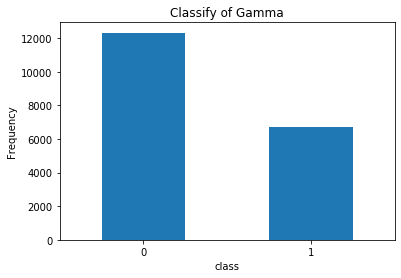

In [9]:
label = ['0','1']
classes = pd.value_counts(data['class'], sort = True)
classes.plot(kind = 'bar', rot=0)
plt.title("Classify of Gamma")
plt.xticks(range(2), label)
plt.xlabel("class")
plt.ylabel("Frequency")

### Pemilihan fitur yang dapat dipakai dari dataset

Untuk lebih spesifik dalam pemilihan data yang dapat digunakan dalam pengecekkan tingkat akurasi suatu dataset, dapat dilakukan Model Selection yang berguna untuk meningkatkan keakurasian yang dicari.

In [11]:
from sklearn.feature_selection import VarianceThreshold
model_selection = VarianceThreshold(threshold=(.8 * (1 - .8)))
new_feature = model_selection.fit_transform(feature)

## 2. Pre-Processing

Pre-processing dengan metode MinMaxScaler dipilih karena dapat mengubah fitur dengan skala sesuai rentang yang diberikan. Hal ini dikarenakan rentang yang ada dari dataset merupakan 0 - 1 atau dapat dikatakan menggunakan klasifikasi biner.

In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()
feature_scaled=scaler.fit_transform(new_feature)

In [13]:
feature_scaled.shape

(19020, 10)

## 3. Categorical

Dalam pengelompokan data yang dgunakan untuk training dan testing, label yang digunakan dapat dikategorikan menggunakan to_categorical  sehingga program dapat membaca tujuan dari program yang ada.

In [14]:
from keras.utils.np_utils import to_categorical
label_categorical=to_categorical(label)
label_categorical.shape

(19020, 2)

## 4. Definisi Model

Dalam kasus ini, dilakukan pengetesan dengan model Sequential, terdapat 10 hidden layer pada kasus ini yang terbagi menjadi input layer dan output layer :

- 1 input layer
- 1 output layer

Penentuan jumlah layer ini berdasarkan percobaan model compile dalam mencapai best model

In [15]:
model = Sequential()
model.add(Dense(10, input_dim=10, activation='relu'))
model.add(Dense(2, activation='softmax'))

## 5. Compile Model

Untuk memulai perhitungan dari layer-layer yang telah dihubungkan. Pada kasus ini dilakukan pembagian dataset menjadi 2 tipe, yaitu : Train Data dan Test Data. Train data yang dilakukan adalah sebesar 90% untuk Test Data dan 10% sisanya digunakan untuk Test data.

In [16]:
from sklearn.model_selection import train_test_split
train_feature, test_feature, train_label, test_label = train_test_split(feature_scaled, label_categorical, test_size=0.10)

Compiling model pada kasus ini menggunakan Optimization score function : "Adam", Loss Function : "categorical_crossentropy" dan Objective Function berupa akurasi yang akan dicapai.

Pemilihan multiclass ini adalah berdasarkan kebutuhan pengukur data. Dimana categorical_crossentropy dipilih karena tujuan dari pengukuran data ini merupakan integer encodings.

Epoch yang dijalankan pada kasus ini sebanyak 50 dan batch size sebesar 32.

Untuk validation data, menggunakan test_feature dan test_label. Hal ini dipilih karena data test sudah dilakukan pemisahan sehingga dapat dilakukan test secara benar.

In [17]:
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])
history=model.fit(train_feature,train_label, epochs=50, batch_size=32,validation_data=(test_feature, test_label))

Train on 17118 samples, validate on 1902 samples
Epoch 1/50
17118/17118 [==============================] - 1s 30us/step - loss: 0.3857 - accuracy: 0.8773 - val_loss: 0.2191 - val_accuracy: 0.9495
Epoch 2/50
17118/17118 [==============================] - 0s 26us/step - loss: 0.1724 - accuracy: 0.9529 - val_loss: 0.1349 - val_accuracy: 0.9642
Epoch 3/50
17118/17118 [==============================] - 0s 25us/step - loss: 0.1211 - accuracy: 0.9653 - val_loss: 0.1012 - val_accuracy: 0.9695
Epoch 4/50
17118/17118 [==============================] - 0s 25us/step - loss: 0.0965 - accuracy: 0.9718 - val_loss: 0.0829 - val_accuracy: 0.9732
Epoch 5/50
17118/17118 [==============================] - 0s 25us/step - loss: 0.0819 - accuracy: 0.9754 - val_loss: 0.0701 - val_accuracy: 0.9779
Epoch 6/50
17118/17118 [==============================] - 0s 25us/step - loss: 0.0712 - accuracy: 0.9793 - val_loss: 0.0615 - val_accuracy: 0.9800
Epoch 7/50
17118/17118 [==============================] - 0s 25us/ste

### Model Predict

Prediksi model ini diambil dari nilai data test feature, karena dat aini telah di pre-processing dimana nantinya nilai prediksi ini dapat digunakan sebagai parameter Confusion Matrix.

In [18]:
predict= model.predict(test_feature)
predict

array([[1.0000000e+00, 2.1947225e-13],
       [1.3087219e-06, 9.9999869e-01],
       [1.0000000e+00, 8.4677300e-12],
       ...,
       [4.5933175e-12, 1.0000000e+00],
       [1.9616103e-03, 9.9803835e-01],
       [1.1079406e-11, 1.0000000e+00]], dtype=float32)

### Evaluasi Model¶

Performa dari dataset MAGIC gamma telescope data ini dapat ditunjukkan dari model evaluate dari data test fitur dan data test label.
Pada percobaan ini didapatkan akurasi sebesar 99.73711967468262% dari data testing.

In [19]:
acc= model.evaluate(test_feature,test_label)
print(acc[1]*100)

1902/1902 [==============================] - 0s 25us/step
99.73711967468262


## Plotting Hasil

Hasil performa yang didapat antara Data Test dan Data Train ditampilkan menjadi sebuah grafik untuk mengetahui baik-tidaknya perbedaan hasil percobaan performa.

### Plot Akurasi

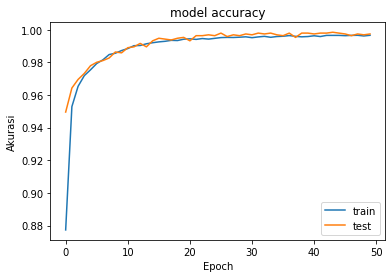

In [20]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('Akurasi')
plt.xlabel('Epoch')
plt.legend(['train','test'], loc='lower right')
plt.show()

### Plot Loss

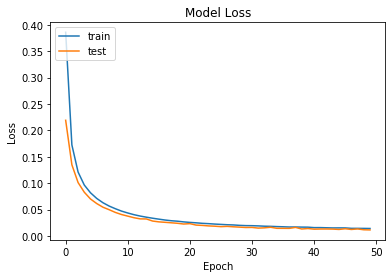

In [21]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [22]:
prediction = model.predict_classes(test_feature)
test_real = np.argmax(test_label,axis=1)

## CONFUSION MATRIX

Setelah mendapatknya hasil dari proses training dan testing, maka dapat dilakukan pengetesan kembali tingkat akurasi data yang diolah dengan confusion matrix dari data yang telah di Pre-processing.

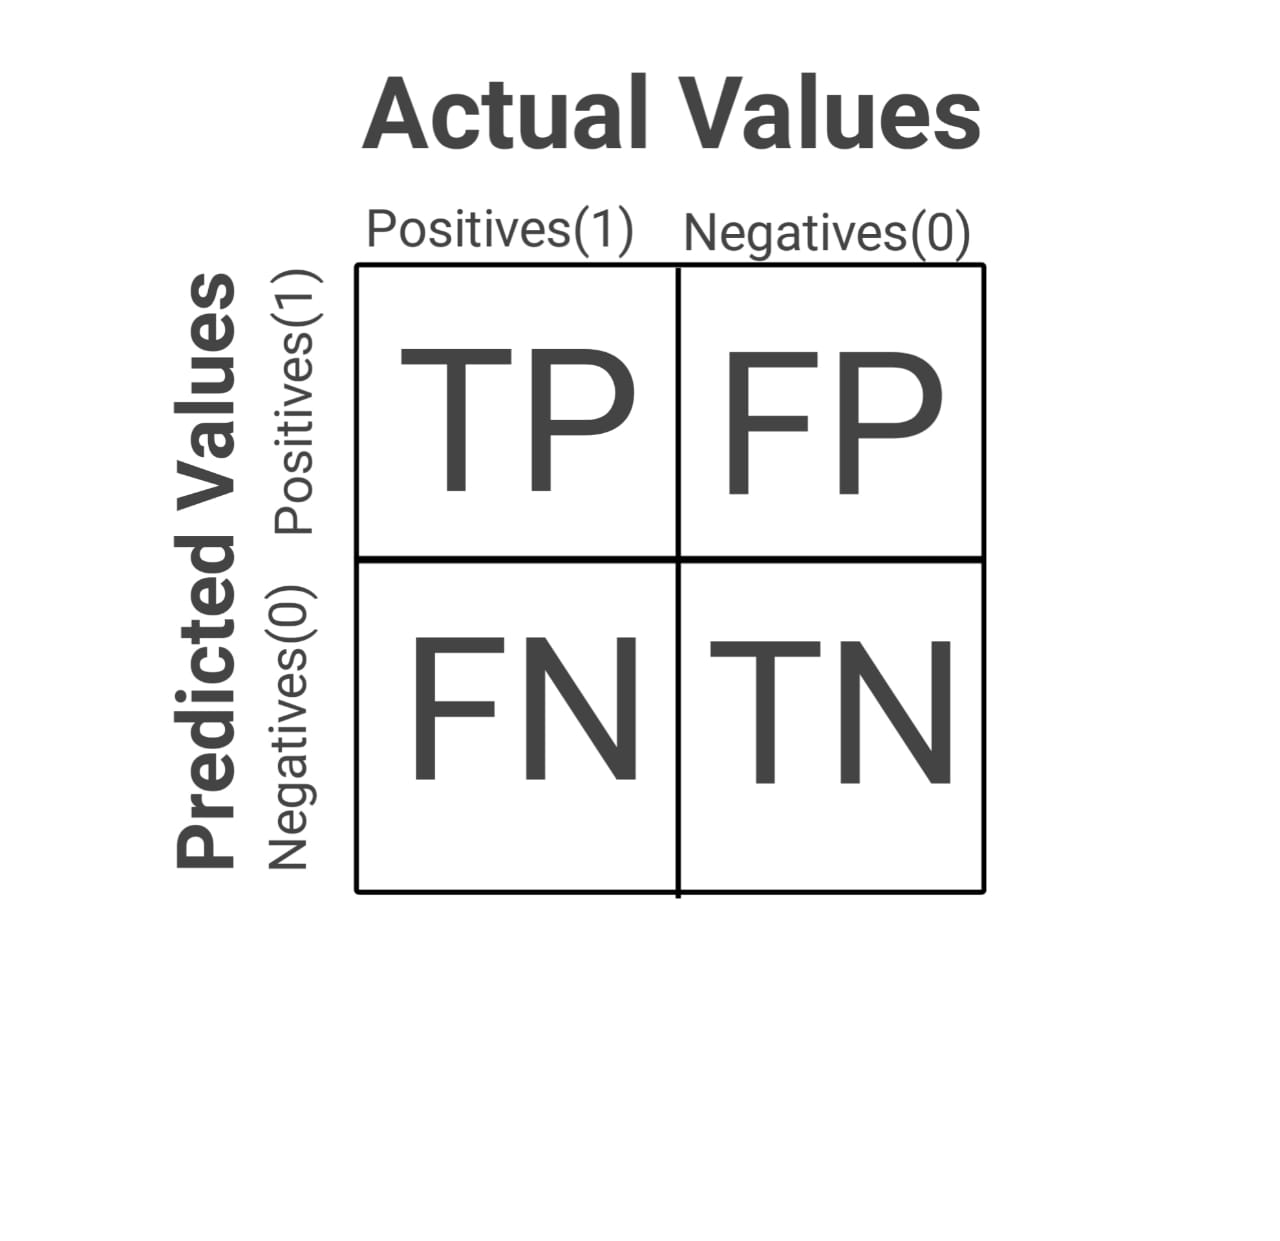

In [33]:
cm = confusion_matrix(test_real, prediction)
TP= cm[0,0]
TN= cm[1,1]
FP= cm[0,1]
FN= cm[1,0]
print ("Confussion matriks:\n",cm)

Confussion matriks:
 [[1216    3]
 [   2  681]]


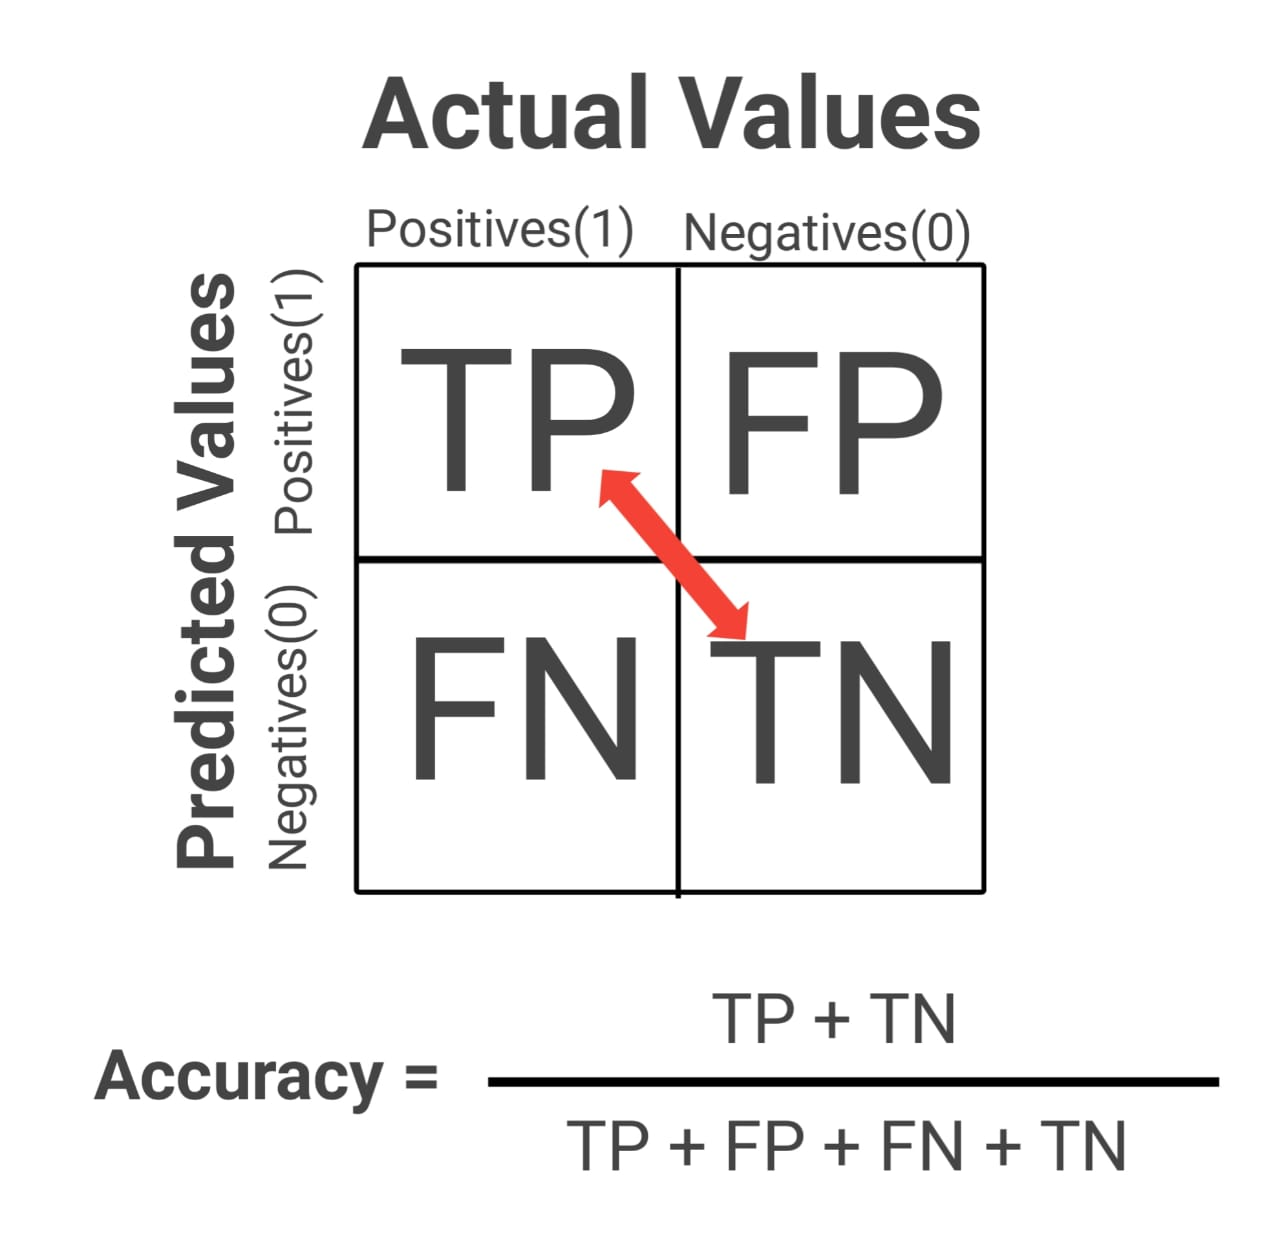
Akurasi dari klasifikasi ini adalah prediksi dari performa yang dibuat dari model yang telah ditentukan.

In [38]:
akurasi=((TP+TN)/(TP+TN+FP+FN))*100
akurasi

99.73711882229233

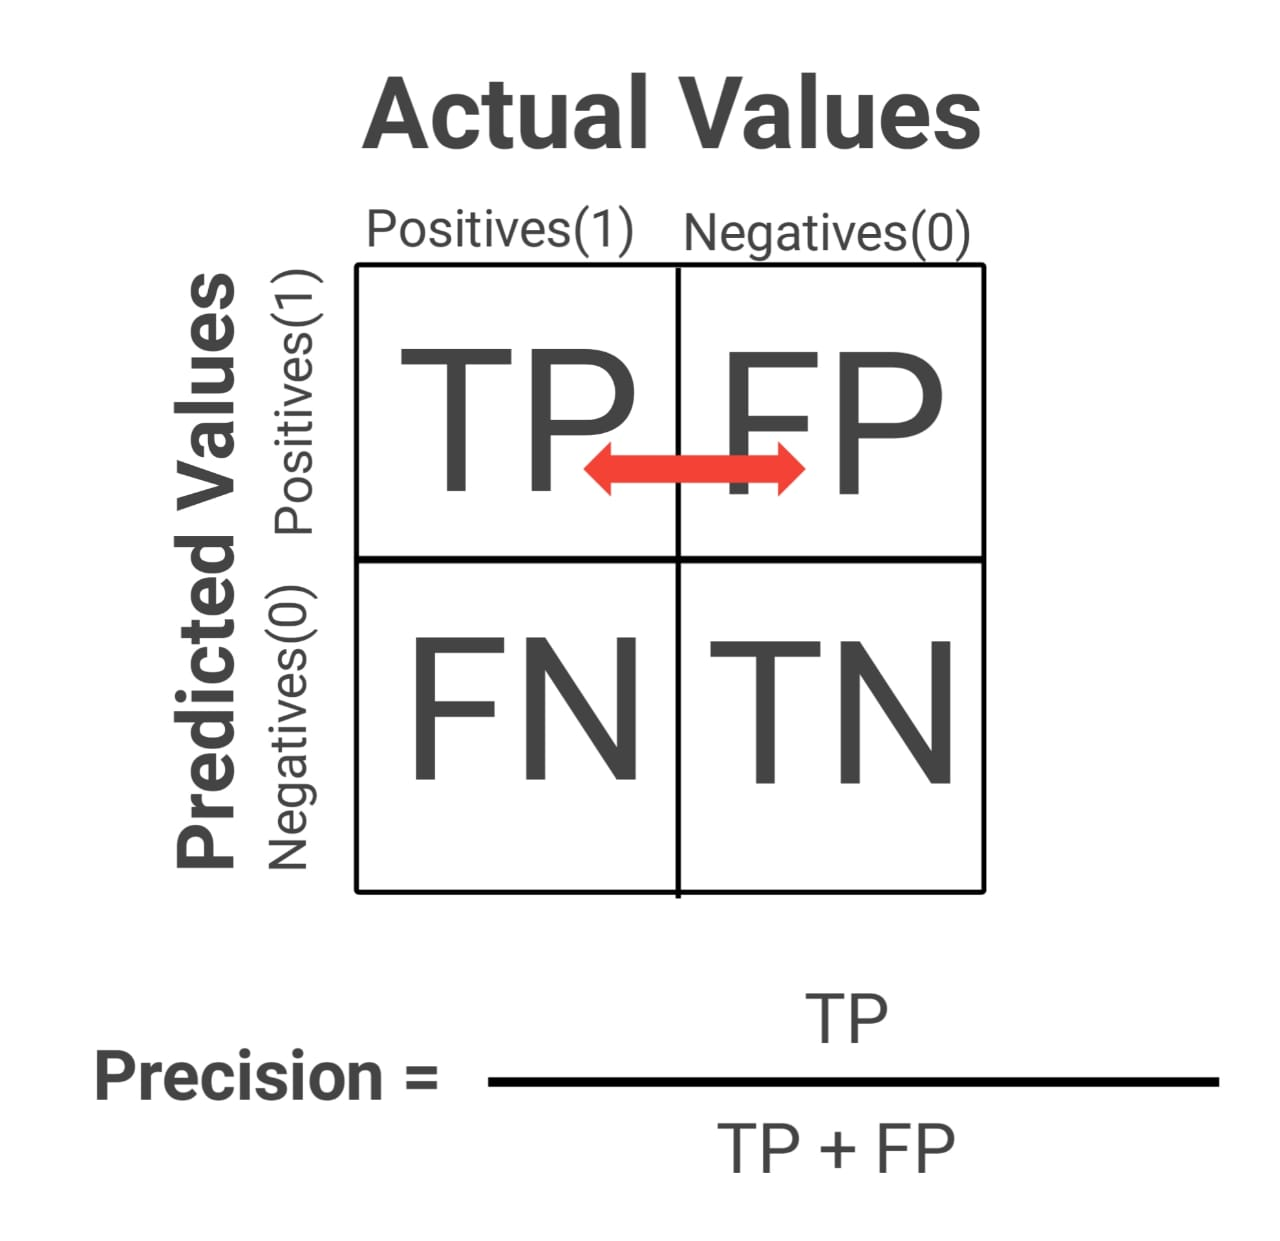
Presisi dari pengukuran ini menunjukkan apakah sinyal tersebut Gamma atau Hedron.

In [39]:
Precision = (TP/(TP+FP)) * 100
Precision

99.75389663658737

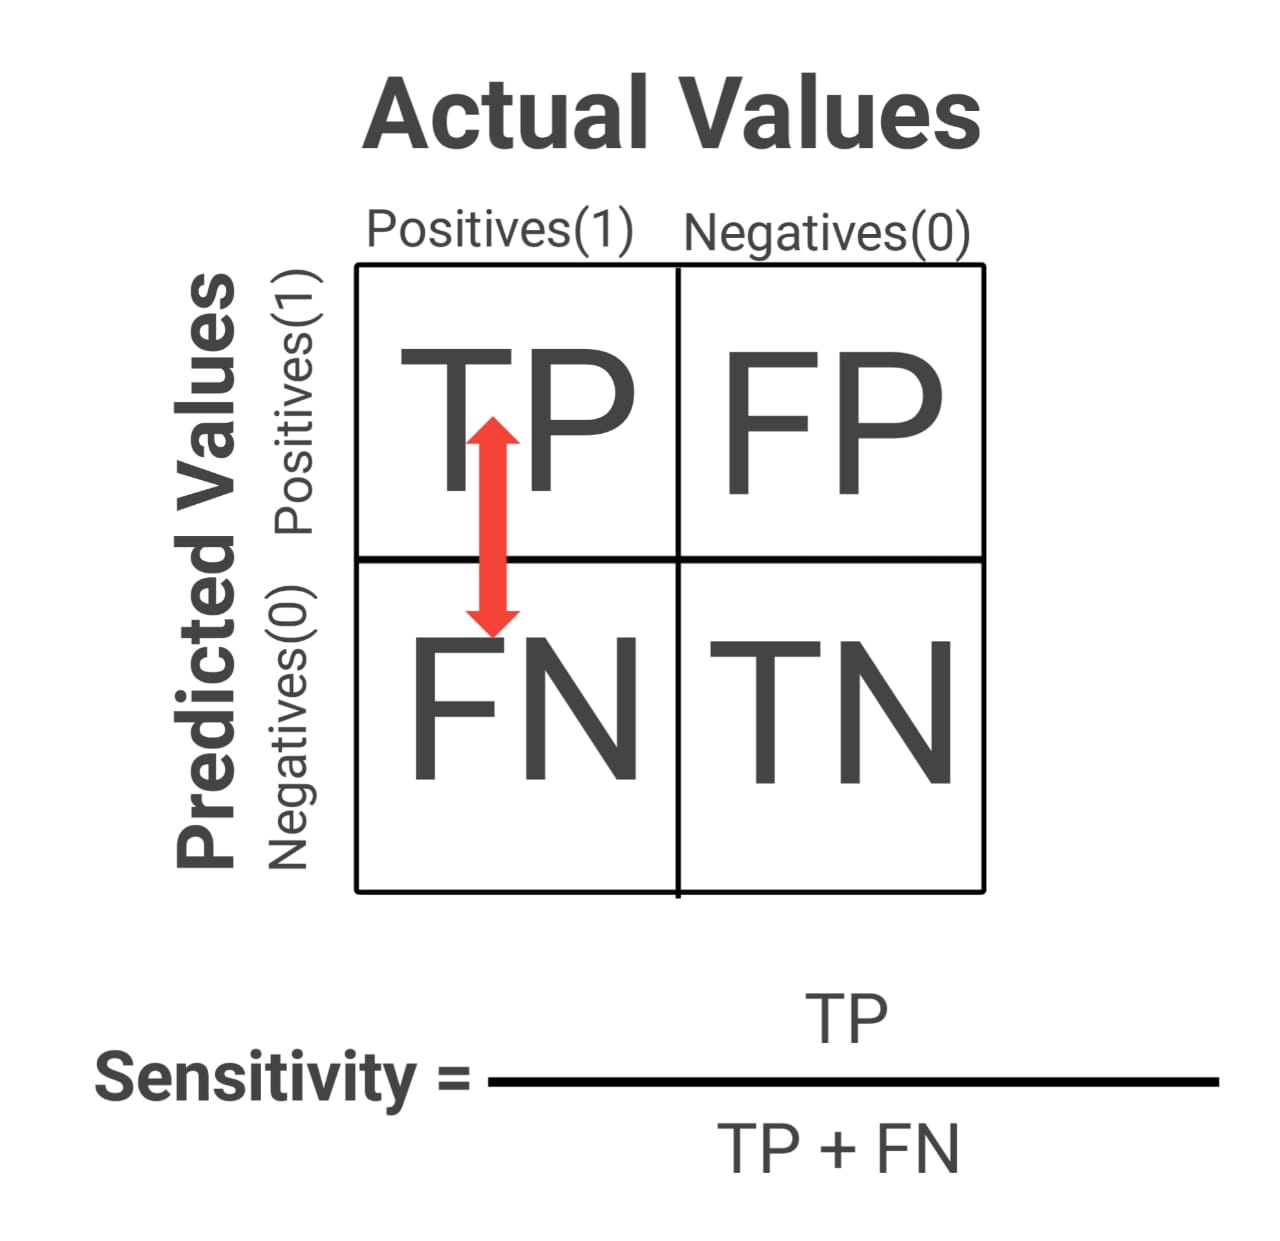
Sensitifitas menunjukkan proporsi sinyal tersebut benar-benar Gamma.

In [40]:
Sensitivity = (TP/(TP+FN) * 100)
Sensitivity

99.83579638752053

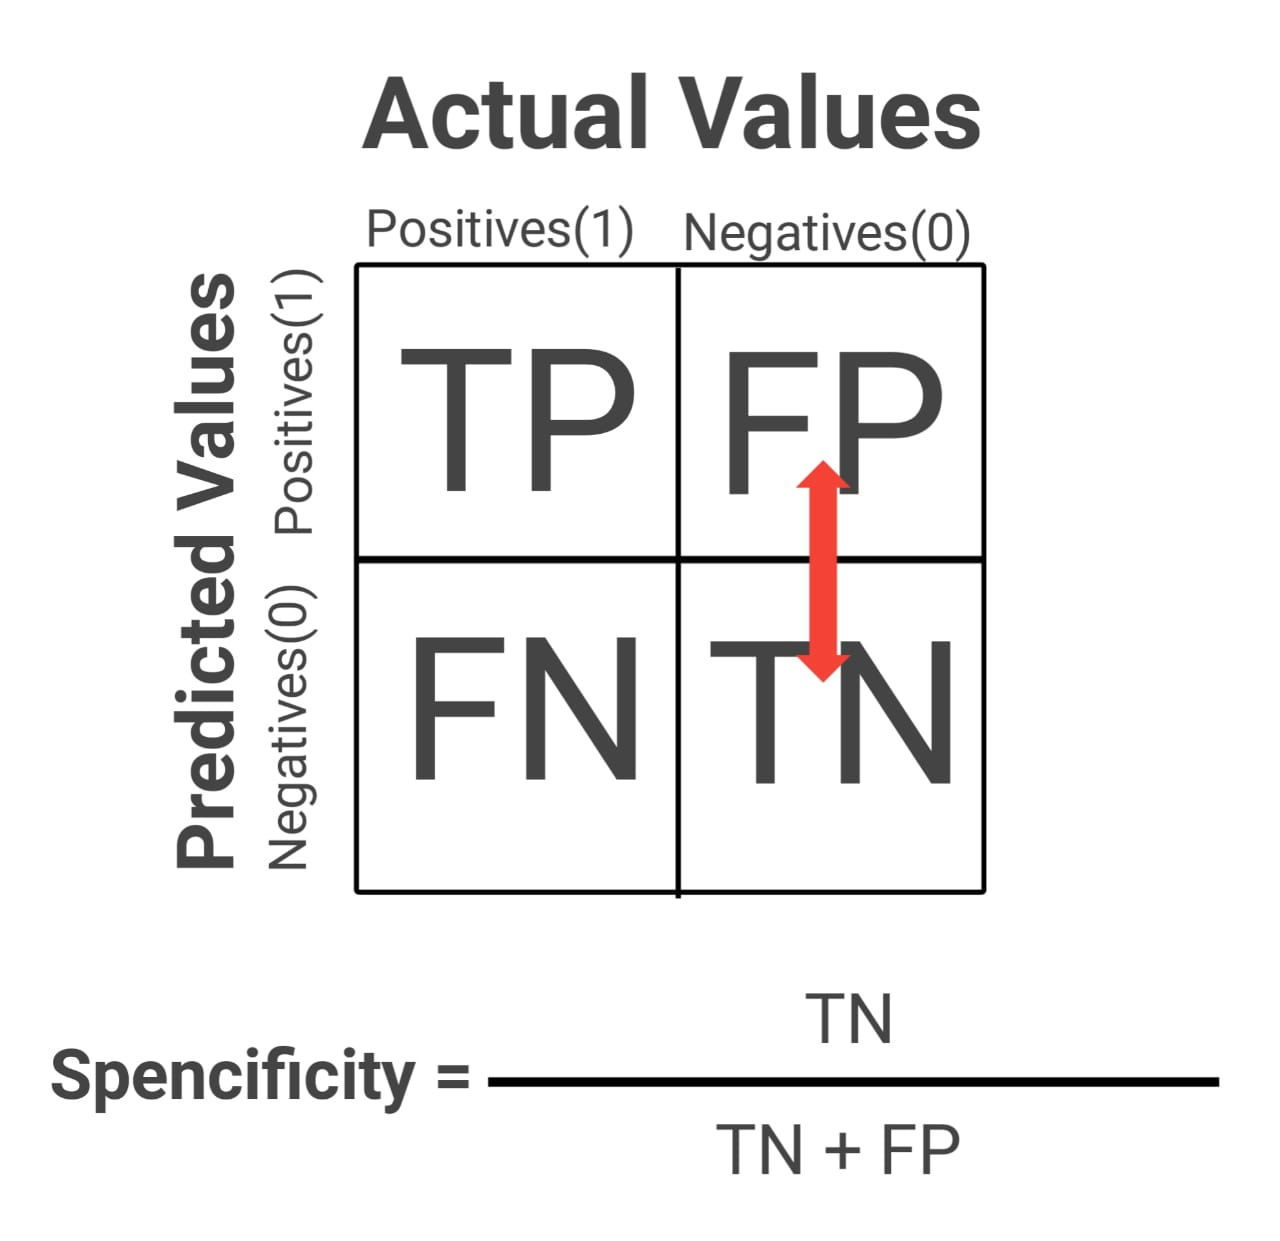
Spesifitas merupakan proporsi sinyal yang bukan Gamma yang di prediksi oleh model sebagai Hedron.

In [41]:
Specivicity = (TN/(TN+FP) * 100)
Specivicity

99.56140350877193